CUSTOMER SEGMENTATION MACHINE LEARNING(UNSUPERVISED)

IMPORTING THE DEPENDENCIES

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from joblib import dump

DATA COLLECTION & ANALYSIS

In [43]:
# loading the data from csv file to a Pandas DataFrame
customers_data = pd.read_csv('C:/Users/YAP EU CHENG/Downloads/AssignmentAICustomerSegmentationUnsupervisedLearning/Mall_Customers.csv')

In [45]:
#Finding the number of rows and columns
customers_data.shape

(200, 5)

In [47]:
# Getting some informations about the dataset
# preview the column and data type and status, num row.
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [49]:
# Checking for missing values
customers_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

CHOOSING THE ANNUAL INCOME COLUMN & SPENDING SCORE COLUMN

In [52]:
X = customers_data.iloc[:,[3,4]].values

print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

CHOOSING THE NUMBER OF CLUSTERS

WCSS --> WITHIN CLUSTERS SUM OF SQUARES

In [66]:
# finding wcss value for different number of clusters
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

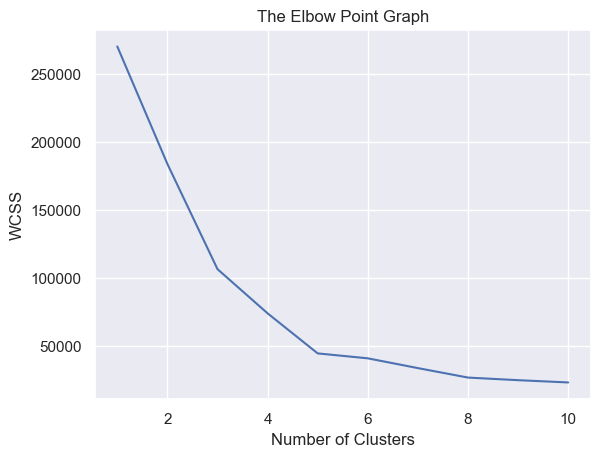

In [58]:
# plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Training the k-Means Clustering Model

In [71]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

dump(kmeans, 'km_model.joblib')

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


Visualizing all the Clusters

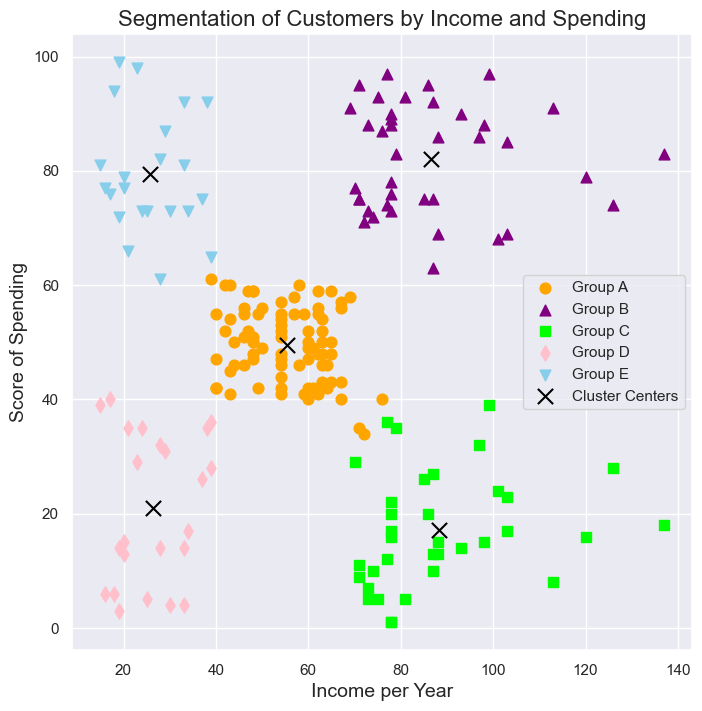

In [73]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Setting up figure size
plt.figure(figsize=(8, 8))

# Plotting each cluster with different colors, sizes, and labels
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=60, c='orange', marker='o', label='Group A')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=60, c='purple', marker='^', label='Group B')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=60, c='lime', marker='s', label='Group C')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s=60, c='pink', marker='d', label='Group D')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s=60, c='skyblue', marker='v', label='Group E')

# Plotting the centroids with distinct colors and size
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=120, c='black', marker='x', label='Cluster Centers')

# Customizing the plot title and axis labels
plt.title('Segmentation of Customers by Income and Spending', fontsize=16)
plt.xlabel('Income per Year', fontsize=14)
plt.ylabel('Score of Spending', fontsize=14)

# Adding a legend
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()


STORE THE MODEL IN JOBLIB

In [75]:
from sklearn.cluster import KMeans
from joblib import dump

In [77]:
dump(kmeans, 'km_model.joblib')

['km_model.joblib']

LOAD THE MODEL AND OUTPUT

In [89]:
import joblib
import numpy as np

# Load the pre-trained KMeans model from joblib
model = joblib.load('km_model.joblib')

# Take input from the user for Annual Income and Spending Score
annual_income = float(input("Enter Annual Income (in $K): "))
spending_score = float(input("Enter Spending Score (1-100): "))

# Create an input array with the new data point
input_array = np.array([[annual_income, spending_score]])

# Use the model to predict the cluster label for this new data point
predicted_cluster = model.predict(input_array)

# Define a mapping from cluster numbers to meaningful group labels (Group A-E)
cluster_map = {
    0: "Group A",  # Median
    1: "Group B",  # Highest
    2: "Group C",  # Median Upper
    3: "Group D",  # Lowest
    4: "Group E",  # Median Lower
}

# Output the cluster label the new customer belongs to
group_label = cluster_map.get(predicted_cluster[0], "Unknown Group")
print(f"The new customer belongs to: {group_label}")



Enter Annual Income (in $K):  20
Enter Spending Score (1-100):  20


The new customer belongs to: Group D
